<a href="https://colab.research.google.com/github/kiriti-krishna/smartinternz_project/blob/main/Hospitality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [ ]:
path ="/content/drive/MyDrive/Hotel Bookings.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
len(df[df.duplicated()])

31994

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Data wrangling.**

In [ ]:
df.drop(columns=["company","agent"],inplace=True)


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Handling Null values.**

In [ ]:
df.children.isna().sum()

4

In [ ]:
df.children.fillna(df.children.mode,inplace=True)
df.children.isna().sum()

0

In [ ]:
df.country.isna().sum()

488

In [ ]:
df.country.fillna(df.country.mode,inplace=True)
df.country.isna().sum()

0

**Insights from the data.**

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

<Axes: ylabel='hotel'>

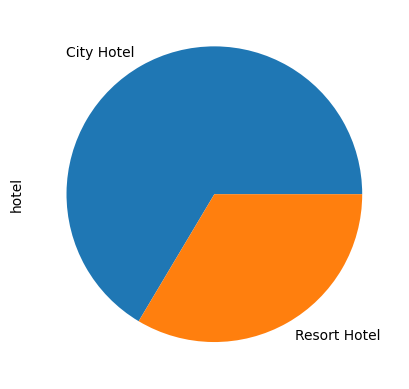

In [ ]:
df['hotel'].value_counts().plot(kind='pie')

In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True)*100)

Total Bookings cancelled
0    75166
1    44224
Name: is_canceled, dtype: int64
Cancelation percentage
0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


**Cancelation rate is 37%**

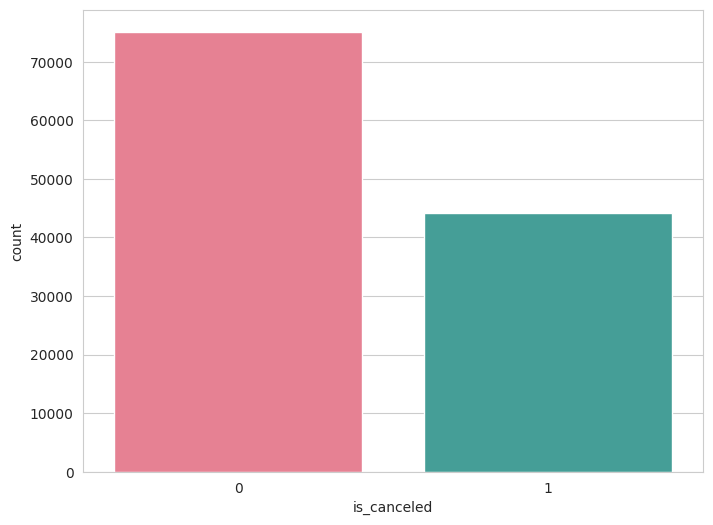

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x=df['is_canceled'],palette='husl')
plt.show()

**Booking ratio between resort hotel and city hotel.**


([<matplotlib.patches.Wedge at 0x7fa37b637ee0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

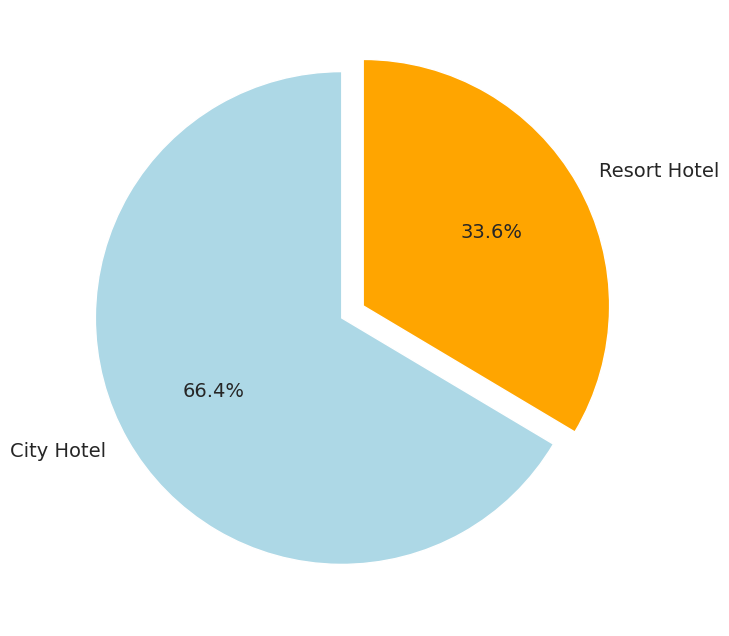

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()

explode = (0, 0.1)
colors = ['lightblue','ORANGE']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

**Overview of booking hotel.**

In [ ]:
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [ ]:
df['children'].groupby(df['hotel']).describe()

,count,unique,top,freq
hotel,,,,
City Hotel,79330.0,5.0,0.0,74220.0
Resort Hotel,40060.0,5.0,0.0,36576.0


**This means that resort hotels are better choice for large families.**



# **FROM WHICH COUNTRY MOST GUEST COME?**




In [ ]:
df.country.value_counts(normalize=True)*100

PRT    40.698551
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
         ...    
DJI     0.000838
BWA     0.000838
HND     0.000838
VGB     0.000838
NAM     0.000838
Name: country, Length: 178, dtype: float64

**Portugal tops the list with 40.69% of the guest**

# Majority of the guests are from European Countries.

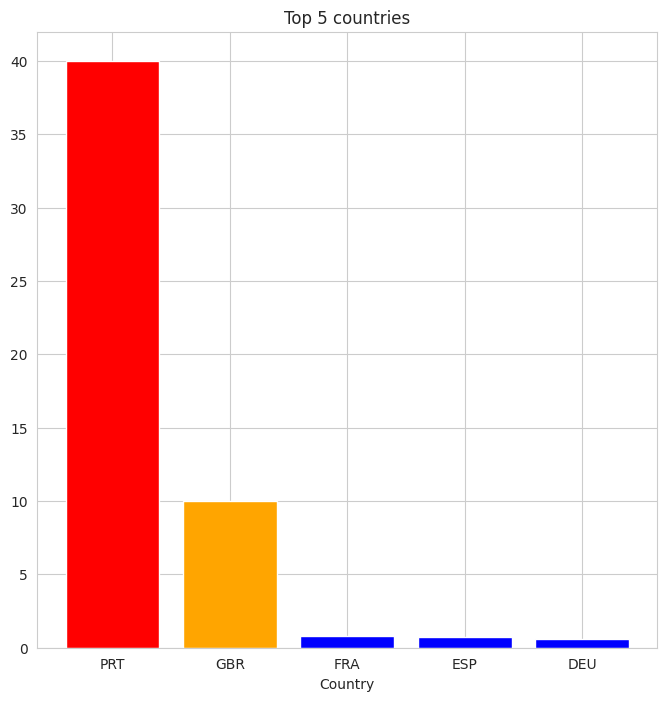

In [ ]:
x=['PRT','GBR','FRA','ESP','DEU']
h=[40,10,0.8,0.7,0.6]
plt.bar(x,h,color=["red","orange","blue","blue","blue"])
plt.xlabel('Country')
plt.title("Top 5 countries")
plt.show()

# **BOOKING PER YEAR**

In [ ]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

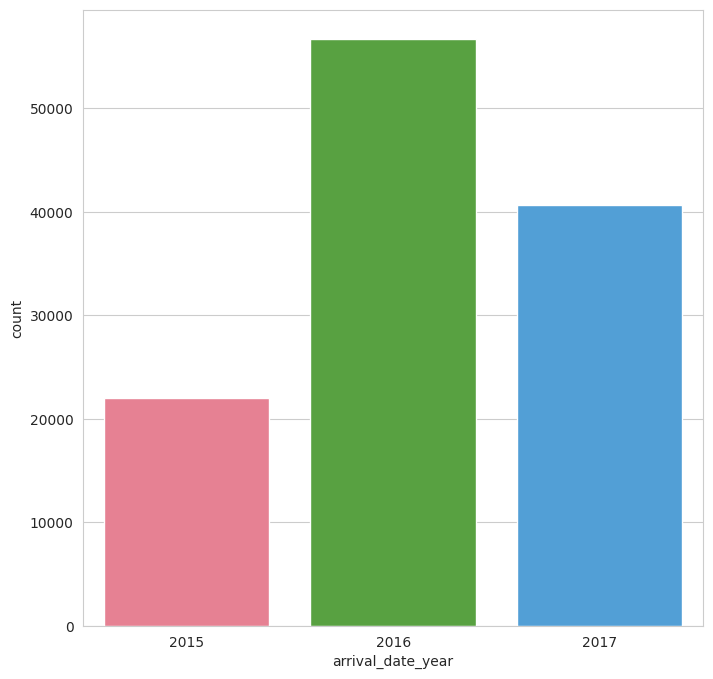

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['arrival_date_year'], palette='husl')
plt.show()

# *BUSIEST MONTH FOR HOTELS*

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

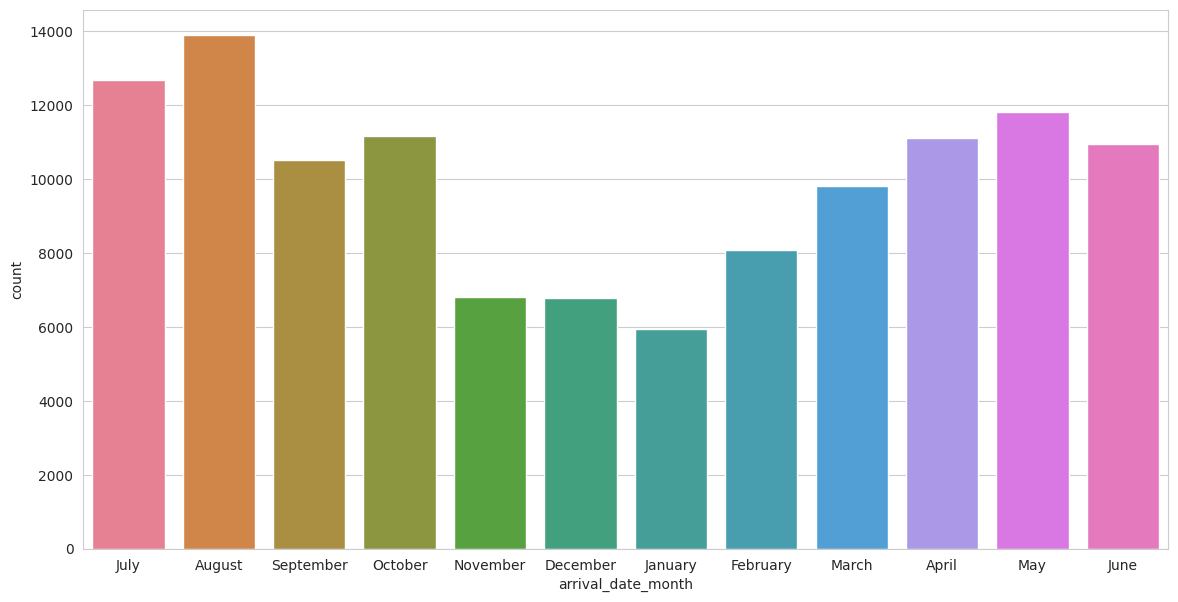

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['arrival_date_month'], palette='husl')
plt.show()

**The Busiest month for hotel is August with 11.62% of the reservations.**
# **MEAL TYPE**

In [ ]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

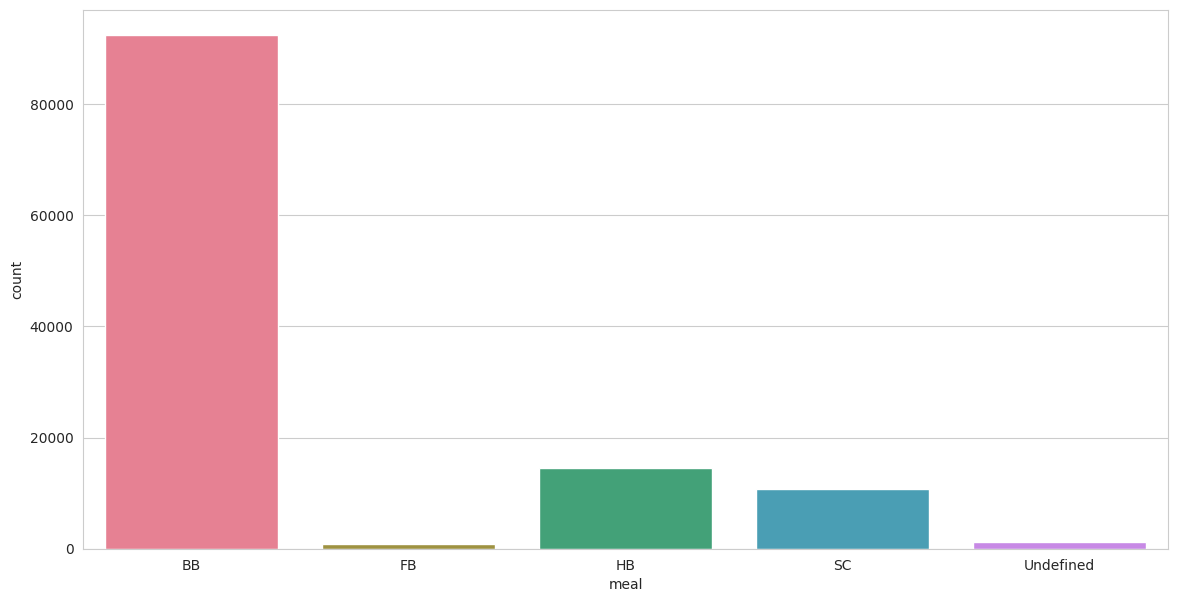

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['meal'], palette='husl')
plt.show()No of travellers in Various Months

# **No of travellers in Various Months**

<BarContainer object of 12 artists>

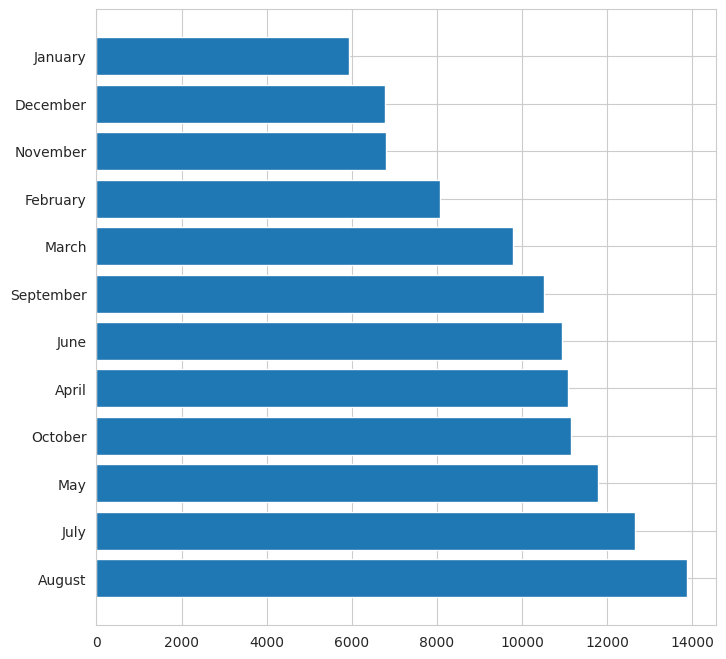

In [ ]:
arrival_month = df.arrival_date_month.value_counts()
plt.barh(arrival_month.index,arrival_month.values)

**So, We can say the peak months are : August, July, May(Summer Time)**
# Accomodation room types

In [ ]:
df.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

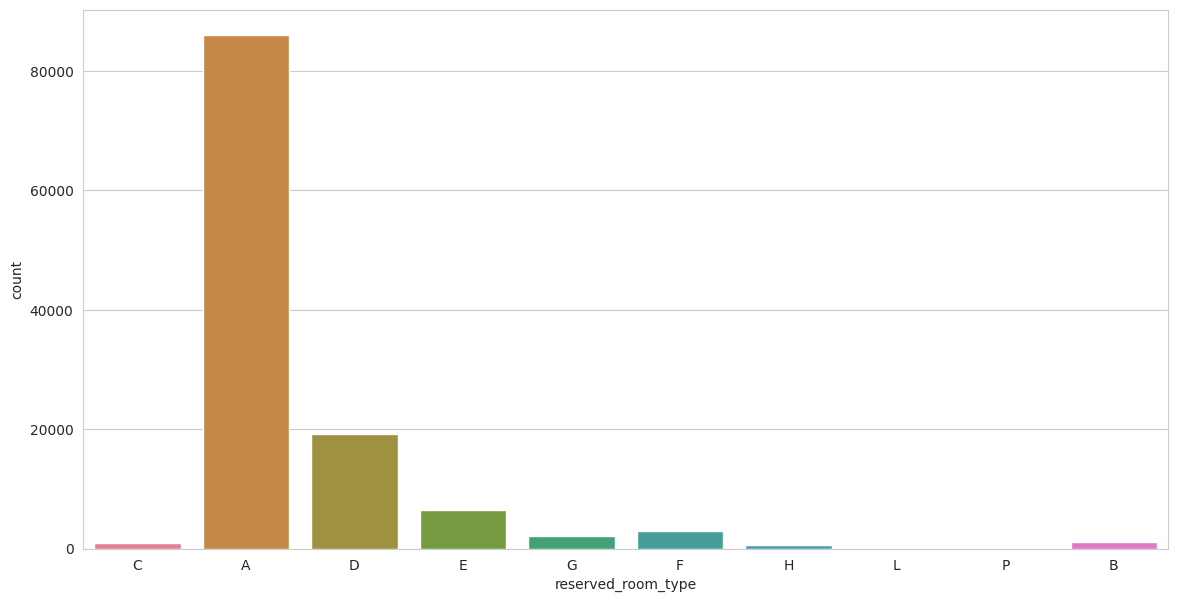

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['reserved_room_type'], palette='husl')
plt.show()

# **REPEATED GUEST**

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

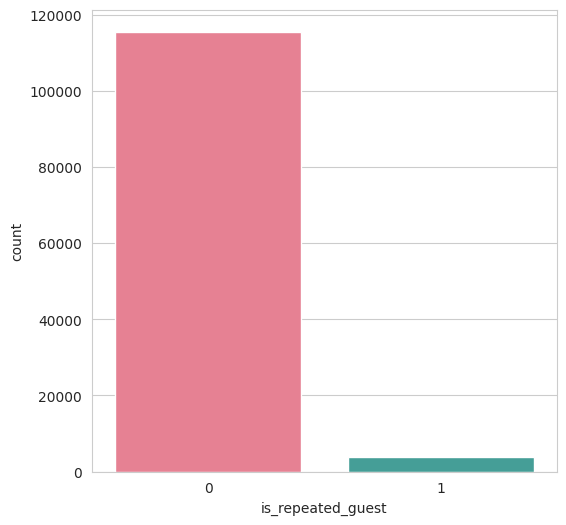

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['is_repeated_guest'], palette='husl')
plt.show()

# Resevation Status


<Axes: xlabel='reservation_status', ylabel='count'>

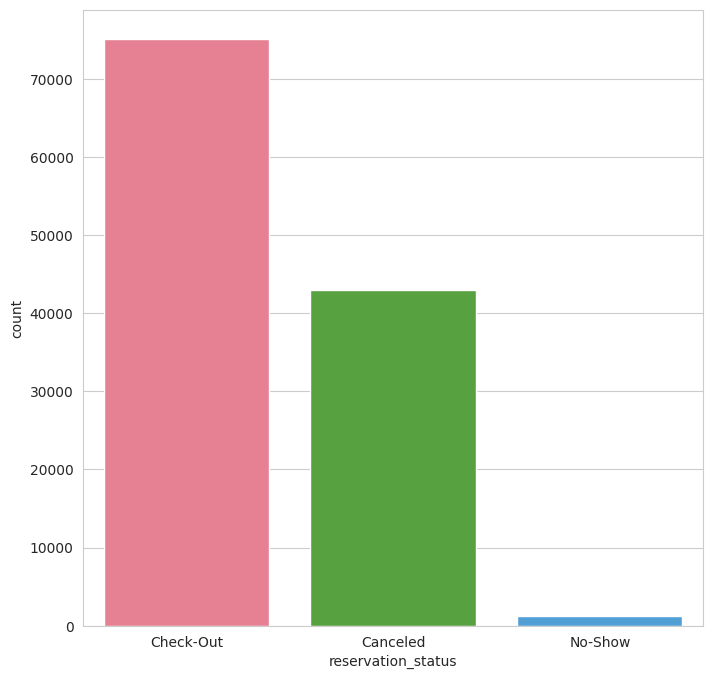

In [ ]:
df.reservation_status.value_counts(normalize=True)
sns.countplot(x=df['reservation_status'],palette='husl')X

#**AVERAGE STAYS WEEKENDS**

0.4637993131753078


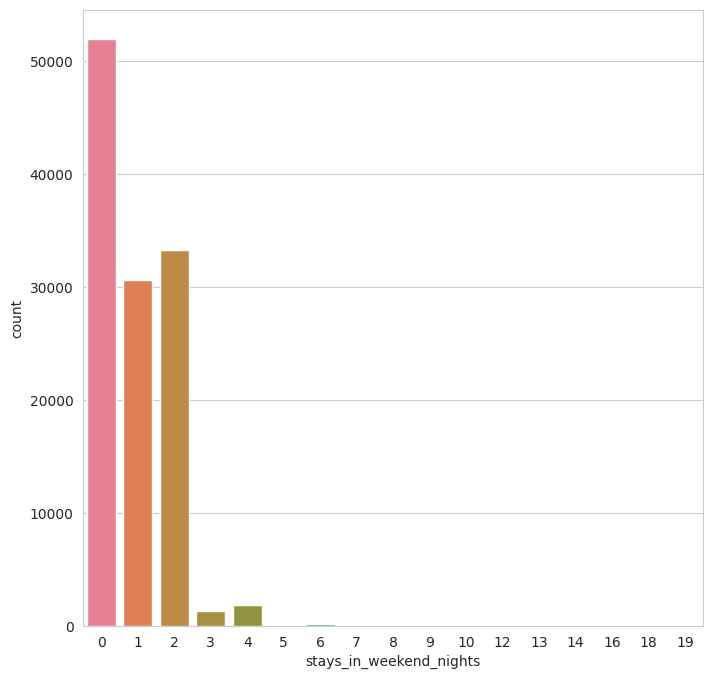

In [ ]:
df.stays_in_weekend_nights.value_counts(normalize=True)
sns.countplot(x=df['stays_in_weekend_nights'],palette='husl')
print(df.stays_in_weekend_nights.mean()/2)

# **AVERAGE STAYS WEEKDAYS**


0.5000603065583382


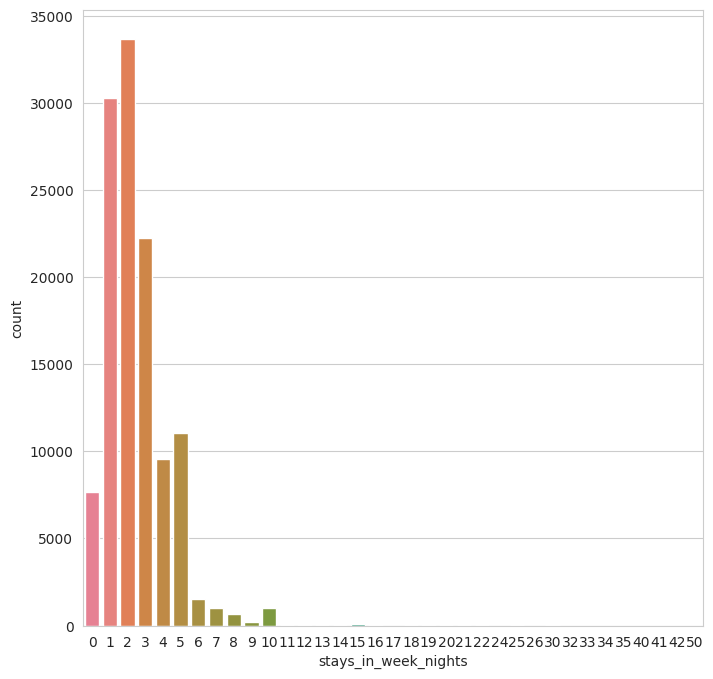

In [ ]:
df.stays_in_week_nights.value_counts(normalize=True)
sns.countplot(x=df['stays_in_week_nights'],palette='husl')
print(df.stays_in_week_nights.mean()/5)

# **Checking the travellers without children**

In [ ]:
df.children[df.children!=0]

13        1.0
45        2.0
55        2.0
65        2.0
87        1.0
         ... 
119270    1.0
119287    1.0
119293    2.0
119318    1.0
119319    2.0
Name: children, Length: 8594, dtype: object

# **Checking the travellers without babies**

In [ ]:
df.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

# **Checking the adult travellers count**

In [ ]:
df.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
single = df[(df['children']==0) & (df['babies']==0)]
actual_single = len(df[df['adults']==1])
actual_single

23027

**There are around 23,027 rooms booked as single room**

In [ ]:


actual_couple  = len(df[df['adults']==2])
actual_couple


89680

**There are around 89,680 rooms booked as couples room**

In [ ]:
actual_family = len(df) - actual_couple - actual_single
actual_family

6683

**There around 6683 rooms booked as family room**
# Room Types

<BarContainer object of 3 artists>

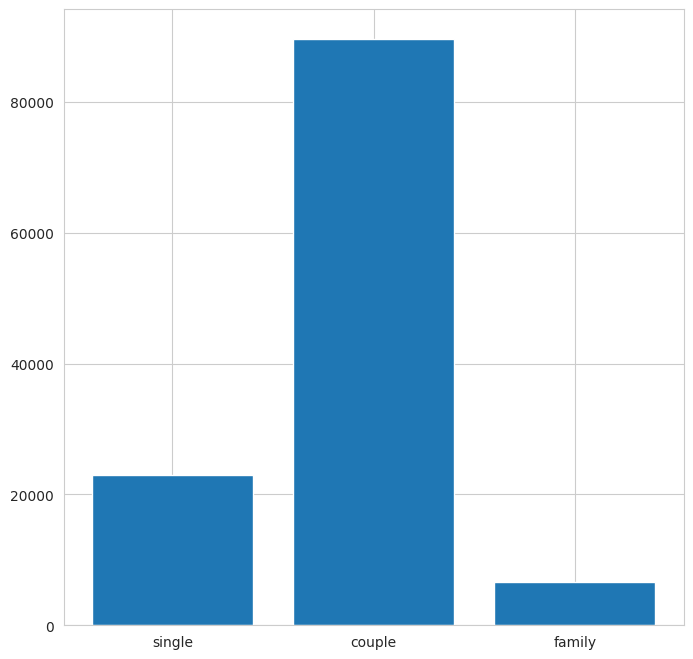

In [ ]:
rooms = ['single','couple','family']
room_count = [actual_single,actual_couple,actual_family]
plt.bar(rooms,room_count)

**majority bookings are couple rooms**
# Online Booking vs Offline Booking

In [ ]:
modes = df.market_segment.value_counts()
modes

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<BarContainer object of 2 artists>

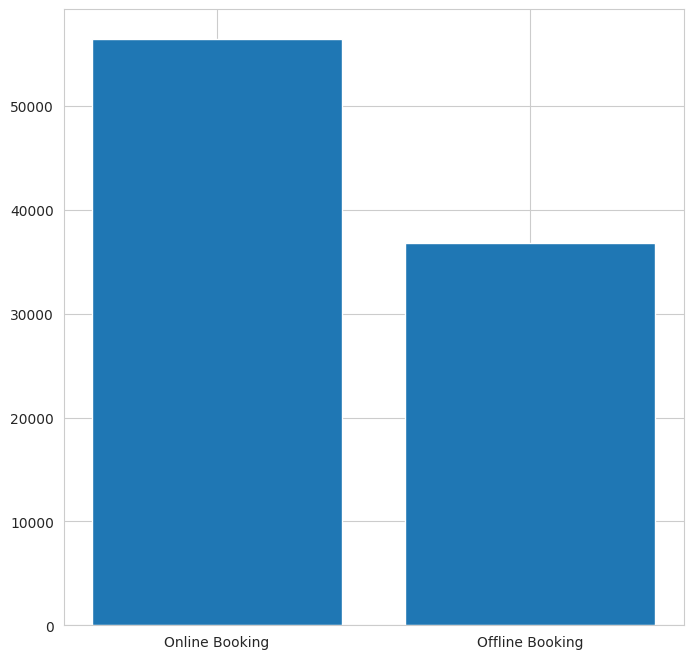

In [ ]:
onlineTa = df[df.market_segment=='Online TA']
mode = ["Online Booking", "Offline Booking"]
mode_count = [modes["Online TA"],modes["Offline TA/TO"]+modes["Direct"]]
plt.bar(mode,mode_count)

#**Majority of the customers book through online rather than offline booking**

In [ ]:
count_cancel=len(df[(df["market_segment"]=="Online TA") & df["is_canceled"]!=0])
total_online = len(df[(df["market_segment"]=="Online TA")])
print("Possibility of Not Cancelling is:",round(100-(count_cancel*100/total_online),2))

Possibility of Not Cancelling is: 63.28


#**Satisfactory of customers**

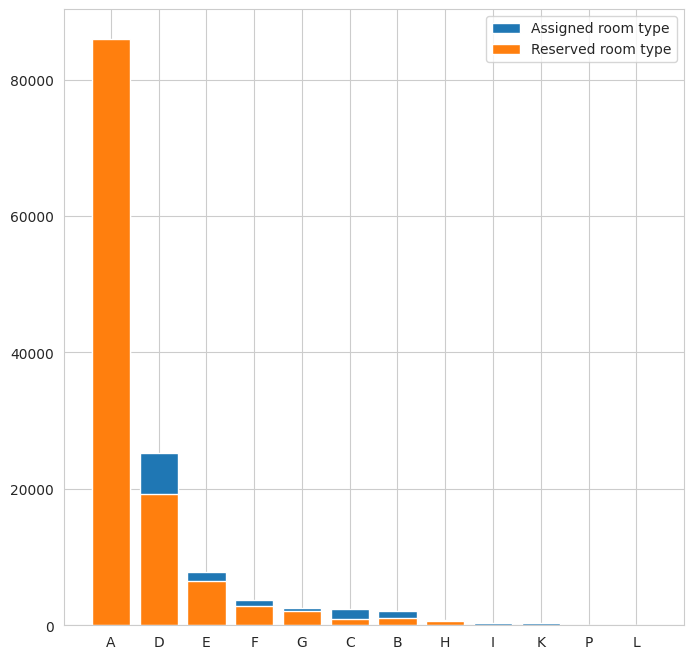

In [ ]:
reserv = df.reserved_room_type.value_counts()
assign = df.assigned_room_type.value_counts()
plt.bar(assign.index,assign.values,label="Assigned room type")
plt.bar(reserv.index,reserv.values,label="Reserved room type")
plt.legend()

#**Based on the exploration of Data we can say that:**
1. During Summer Season the hotels are expected to get more no of bookings than any other seasons. So, if You want to enjoy privacy You can book in remaining seasons.

2. Majority of the Bookings happen through online as it is very easy and efficient way.

3. We can clearly see the average stay is between 1-3 days we must try to extend the duration as there is high chance to get attrcative deals from the hotels.